In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Rename columns to lower case:
df0.columns = df0.columns.str.lower()
# Correct 'average_montly_hours' to 'average_monthly_hours'
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable.
df1 = df0.drop_duplicates(keep='first').copy()

# Display first few rows of new dataframe.
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'salary' column using .loc
df1.loc[:, 'salary_encoded'] = label_encoder.fit_transform(df1['salary'])
# Drop the 'salary' column
df1 = df1.drop(columns='salary').copy()

df_encoded = pd.get_dummies(df1, columns=['department'], drop_first=True)

In [ ]:
# convert df_encoded['average_monthly_hours'] to categorical variable.
# create a new column called 'owerworked' with values:
#  < 161: '0'
# 161-200: '1'
# 200 < : '2'
df_encoded['overworked'] = pd.cut(df_encoded['average_monthly_hours'], bins=[0, 161, 200, 1000], labels=['0', '1', '2'])
df_encoded = df_encoded.drop(columns='average_monthly_hours')


In [ ]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,salary_encoded,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,3,0,1,0,1,False,False,False,False,False,False,True,False,False,0
1,0.80,0.86,5,6,0,1,0,2,False,False,False,False,False,False,True,False,False,2
2,0.11,0.88,7,4,0,1,0,2,False,False,False,False,False,False,True,False,False,2
3,0.72,0.87,5,5,0,1,0,1,False,False,False,False,False,False,True,False,False,2
4,0.37,0.52,2,3,0,1,0,1,False,False,False,False,False,False,True,False,False,0


In [ ]:
# Convert boolean department columns to uint8
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype('uint8')

# Verify all binary/categorical columns are uint8
binary_cols = ['work_accident', 'left', 'promotion_last_5years', 'salary_encoded', 'overworked'] + list(bool_cols)
df_encoded[binary_cols] = df_encoded[binary_cols].astype('uint8')

# Float columns can stay as float64
float_cols = ['satisfaction_level', 'last_evaluation']
df_encoded[float_cols] = df_encoded[float_cols].astype('float64')

# Integer columns as uint8
int_cols = ['number_project', 'time_spend_company']
df_encoded[int_cols] = df_encoded[int_cols].astype('uint8')

# Verify new dtypes
print("\nUpdated datatypes:")
print(df_encoded.dtypes)


Updated datatypes:
satisfaction_level        float64
last_evaluation           float64
number_project              uint8
time_spend_company          uint8
work_accident               uint8
left                        uint8
promotion_last_5years       uint8
salary_encoded              uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
overworked                  uint8
dtype: object


In [ ]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,salary_encoded,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,6,0,1,0,2,0,0,0,0,0,0,1,0,0,2
2,0.11,0.88,7,4,0,1,0,2,0,0,0,0,0,0,1,0,0,2
3,0.72,0.87,5,5,0,1,0,1,0,0,0,0,0,0,1,0,0,2
4,0.37,0.52,2,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Create X and y for classification task
X = df_encoded.drop(columns=['left'])
y = df_encoded['left']

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing) with stratification
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# Split the training data into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.2, random_state=42)


In [ ]:
# Create a random forest model using GridSearch cross-validation
# Initialize the random forest model
rf_model = RandomForestClassifier(random_state=42)

# Set the parameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'}
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1, verbose=2, refit='recall')

In [ ]:
# Fit the model to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=2)

In [ ]:
# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
# Use the best model found
best_rf_model = grid_search.best_estimator_

In [ ]:
# For saving the model
import joblib
import time
# Create a variable called timestr to store the current date and time
timestr = time.strftime("%Y%m%d-%H%M%S")

In [ ]:
# Save the model
joblib.dump(best_rf_model, f'salifort_rf_model{timestr}.pkl')


['salifort_rf_model20241207-094355.pkl']

In [ ]:
# Predict and evaluate using the tuned model
y_pred_best = best_rf_model.predict(X_val)
y_pred_test = best_rf_model.predict(X_test)

In [ ]:
# Evaluate the model performance on the validation set
print("Classification report; Validation set: \n", classification_report(y_val, y_pred_best))

# Evaluate the model performance on the test set
print("Classification report; TEST set: \n", classification_report(y_test, y_pred_test))


Classification report; Validation set: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1600
           1       0.98      0.91      0.94       319

    accuracy                           0.98      1919
   macro avg       0.98      0.95      0.97      1919
weighted avg       0.98      0.98      0.98      1919

Classification report; TEST set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



Confusion matrix, validations set:
 [[1594    6]
 [  30  289]]


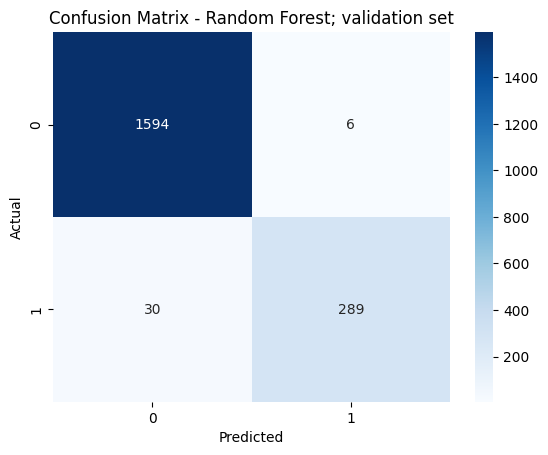

In [ ]:
# Confusion matrix validation set
print('Confusion matrix, validations set:\n', confusion_matrix(y_val, y_pred_best))
# Plot confusion matrix validation set
cm = confusion_matrix(y_val, y_pred_best)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest; validation set')
plt.show()

Confusion matrix, validations set:
 [[1994    7]
 [  30  368]]


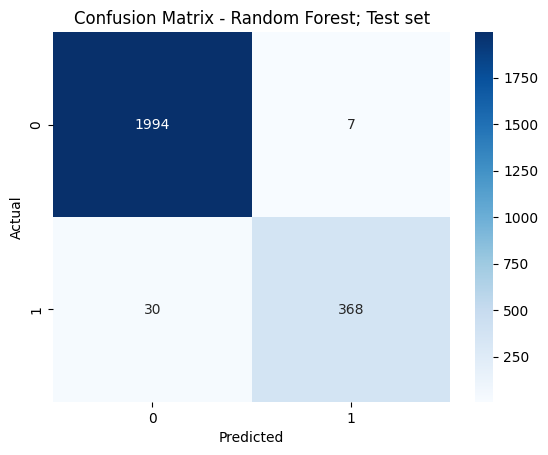

In [ ]:
# Confusion matrix TEST set
print('Confusion matrix, validations set:\n', confusion_matrix(y_test, y_pred_test))
# Plot confusion matrix validation set
cm = confusion_matrix(y_test, y_pred_test)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest; Test set')
plt.show()

In [ ]:
# Get predicted probabilities
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

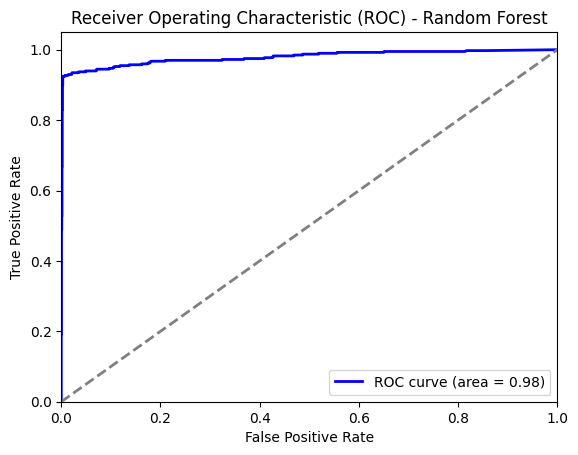

In [ ]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Get the feature importances from the model
importances = best_rf_model.feature_importances_

# Create a dataframe to display feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

                   Feature  Importance
0       satisfaction_level    0.362364
2           number_project    0.205926
3       time_spend_company    0.183249
1          last_evaluation    0.142588
16              overworked    0.070705
6           salary_encoded    0.010013
4            work_accident    0.007333
13        department_sales    0.002880
15    department_technical    0.002855
14      department_support    0.002236
11    department_marketing    0.001810
8    department_accounting    0.001525
5    promotion_last_5years    0.001501
10   department_management    0.001376
9            department_hr    0.001300
7         department_RandD    0.001248
12  department_product_mng    0.001093


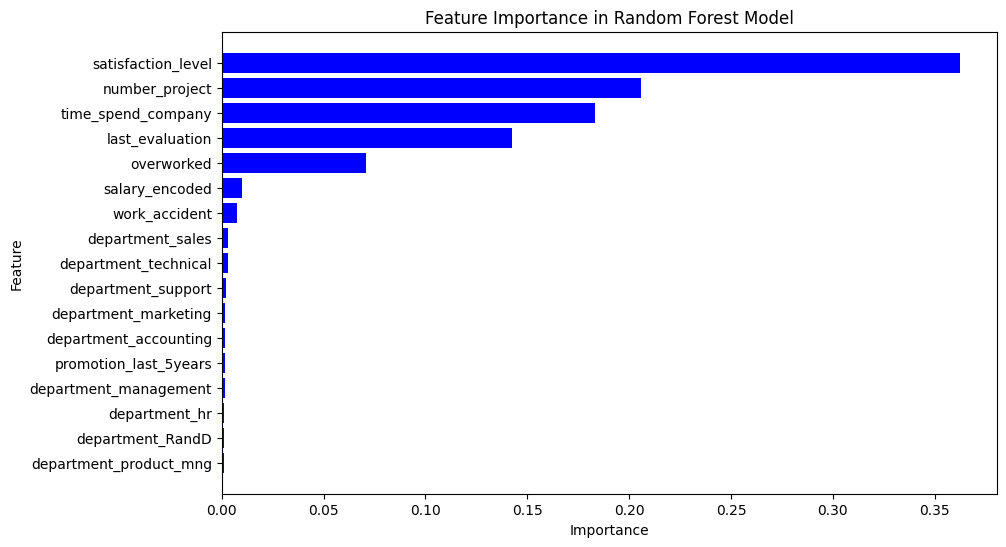

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To have the most important features at the top
plt.show()